## CV Project - 7 

### Two class classification of heart sound signals using the discrete wavelet transform

###### Sourav Das (121CS0161)
###### Ashutosh Das (121CS0159)
###### Rajdeep Das (121CS0160)
###### Digesh Dansana (121CS0158)

In [2]:
import os
import pywt
import librosa
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from tensorflow import keras
from keras.optimizers import Adam
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier
from keras.losses import binary_crossentropy
from keras.layers import Input, Dense, Conv1D,MaxPool1D,Flatten,BatchNormalization

2024-04-11 12:20:31.116299: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-11 12:20:31.233190: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-11 12:20:31.233262: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-11 12:20:31.250917: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-11 12:20:31.294326: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-11 12:20:31.295287: I tensorflow/core/platform/cpu_feature_guard.cc:1

### Sample output for a Normal Test Case 

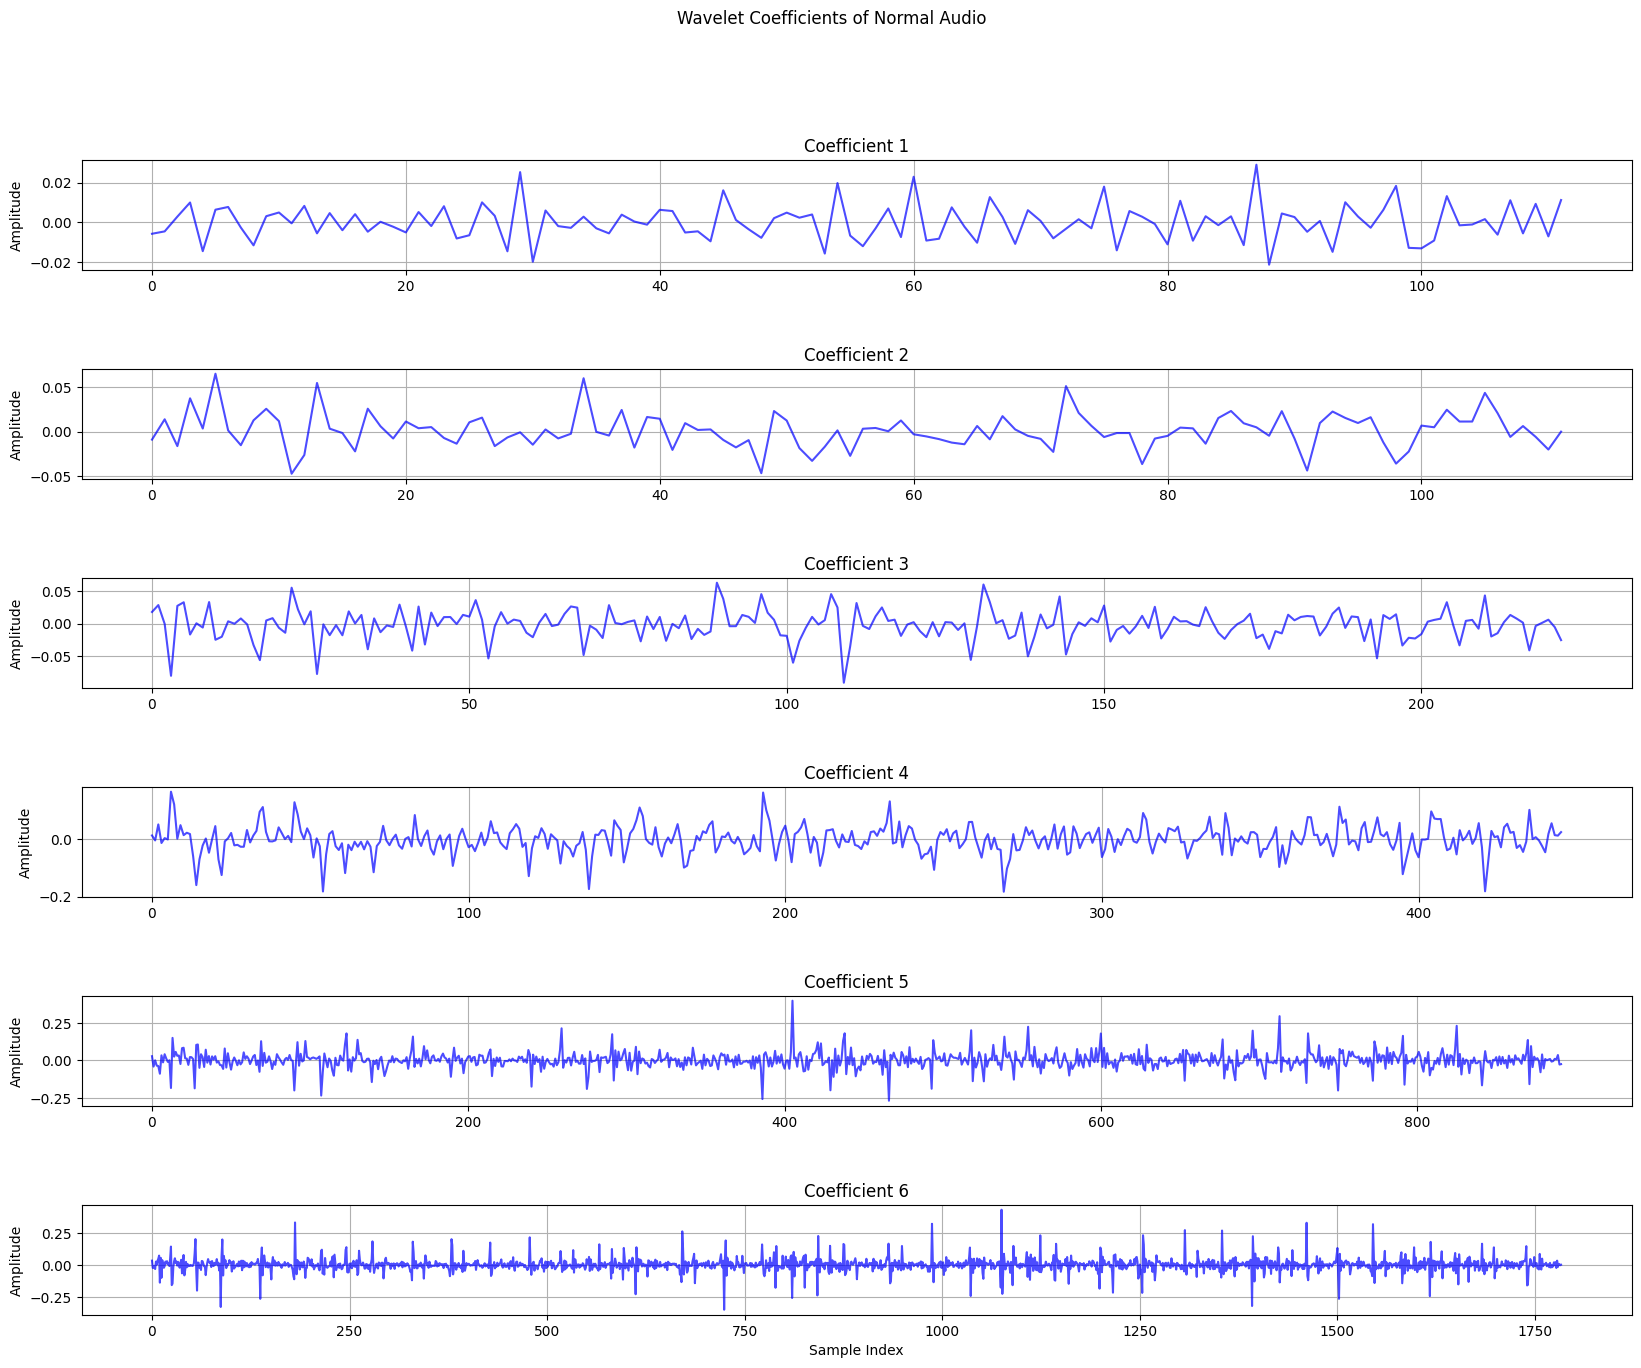

In [3]:
# Example of how to use wavelet transform on a single audio file
from matplotlib import transforms


filename = os.getcwd() + '/data/Normal/a0007.wav'

# Load audio file
data, sr = librosa.load(filename)

# Resample audio data to new sample rate
new_sample_rate = 100
resampled_data = librosa.resample(y=data, orig_sr=sr, target_sr=new_sample_rate)

# Perform wavelet transform
wavelet_coeffs = pywt.wavedec(resampled_data, 'haar', level=5)
cA1, cD5, cD4, cD3, cD2, cD1 = wavelet_coeffs

# Plot wavelet coefficients
plt.figure(figsize=(20, 15))  # Increase the plot window size
for i, coeff in enumerate(wavelet_coeffs):
    plt.subplot(6, 1, i+1)
    plt.plot(coeff, color='b', alpha=0.7)
    plt.ylabel('Amplitude')
    plt.title(f'Coefficient {i+1}')
    plt.grid(True)

plt.subplots_adjust(hspace=0.9)  # Increase the vertical space between subplots
plt.suptitle('Wavelet Coefficients of Normal Audio')  # Add a title to the entire plot
plt.xlabel('Sample Index')
plt.show()



### Sample output for a Abnormal Test Case 

<Figure size 640x480 with 0 Axes>

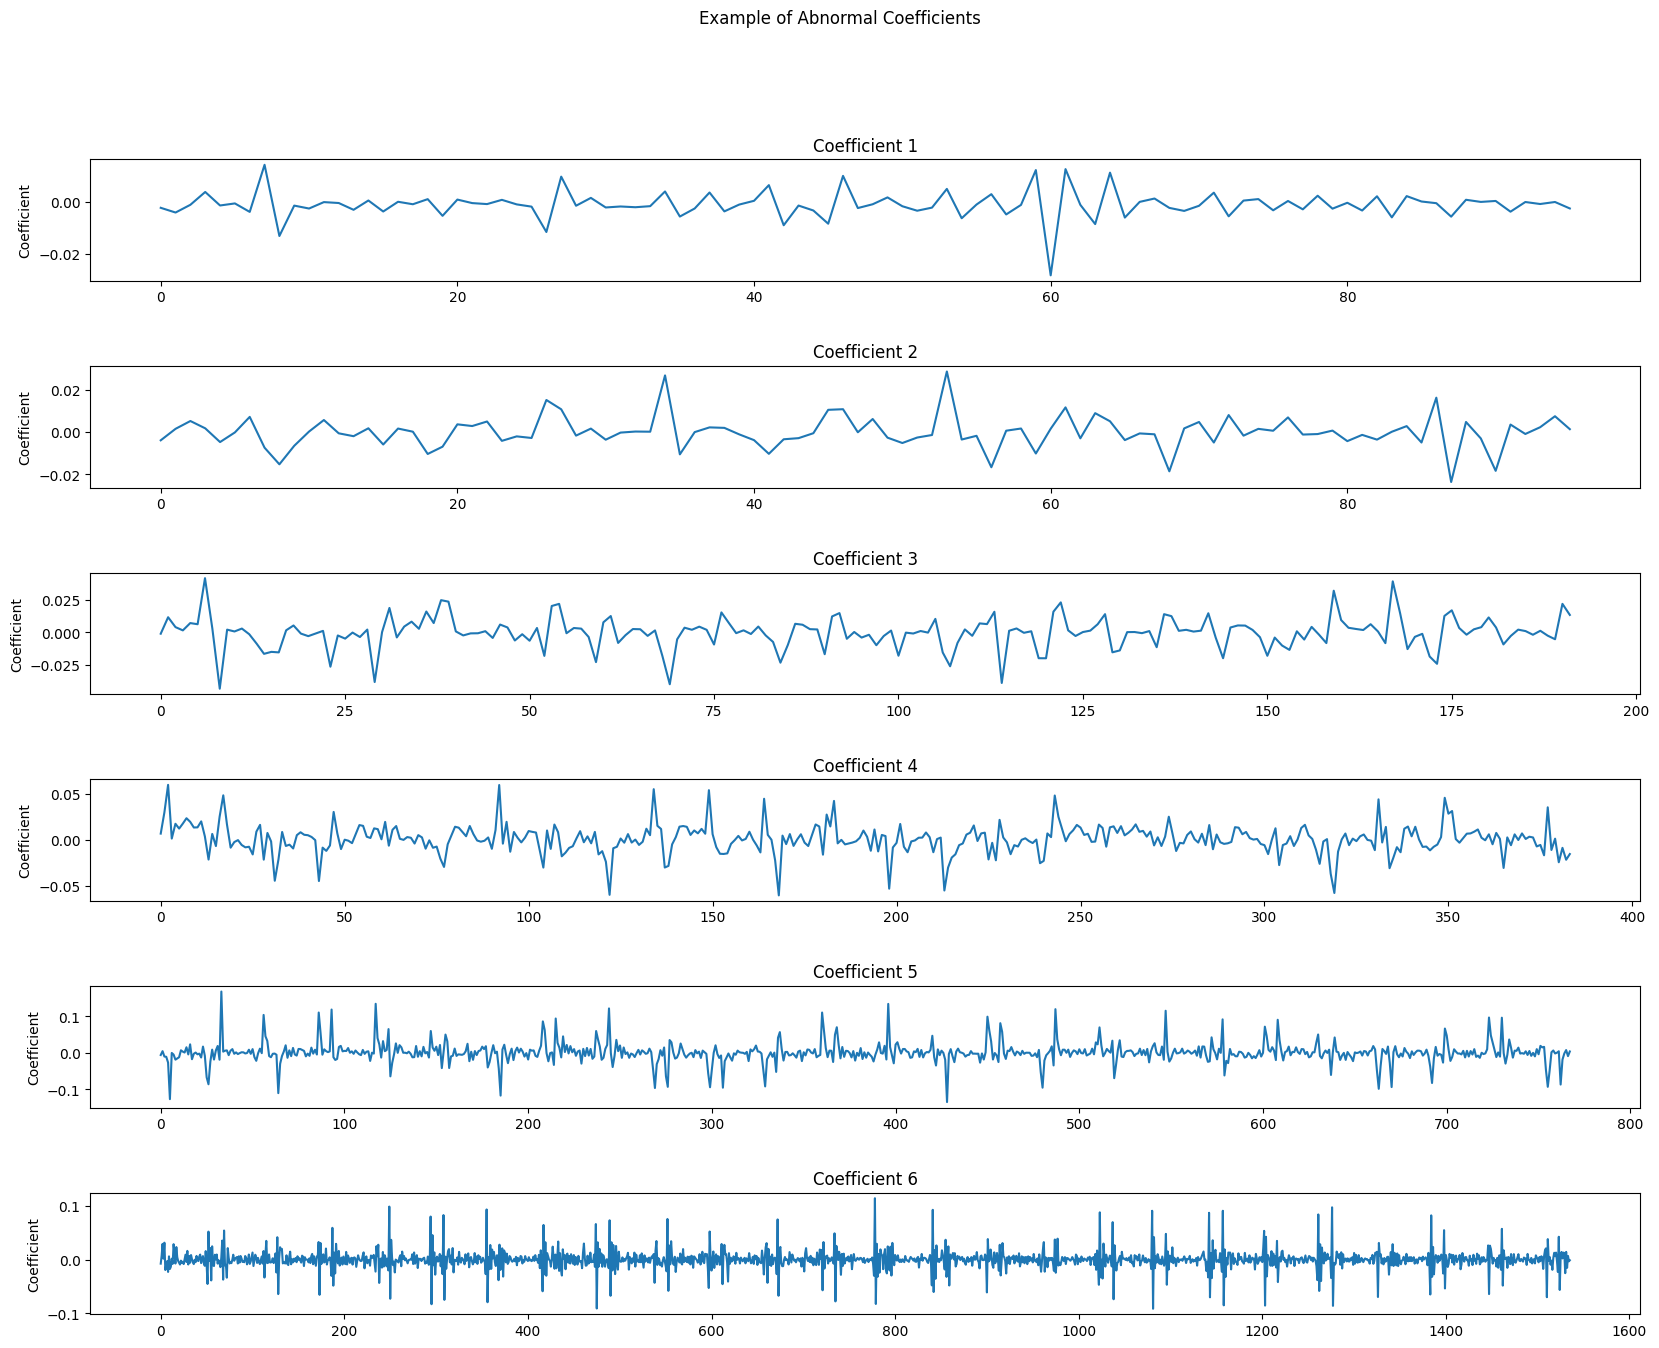

In [4]:
#Example of how to use wavelet transform on a single audio file
filename = os.getcwd() + '/data/Abnormal/a0003.wav'
data , sr = librosa.load(filename)


new_sample_rate = 100
resampled_data = librosa.resample(y=data,orig_sr=sr,target_sr=new_sample_rate)

wavelet_coeffs = pywt.wavedec(resampled_data, 'haar', level=5)
cA1, cD5, cD4, cD3, cD2, cD1 = wavelet_coeffs

# plot
plt.figure()
wavelet_coeffs = [cA1, cD5, cD4, cD3, cD2, cD1]
plt.figure(figsize=(20, 15))  # Increase the plot window size
for i, coeff in enumerate(wavelet_coeffs):
    plt.subplot(6, 1, i+1)
    plt.plot(coeff)
    plt.ylabel('Coefficient')
    plt.title(f'Coefficient {i+1}')

plt.subplots_adjust(hspace=0.7)  # Increase the vertical space between subplots
plt.suptitle('Example of Abnormal Coefficients')  # Add a title to the entire plot
plt.show()


### Extraction of Audio files along with labels and spilt them into training and testing set

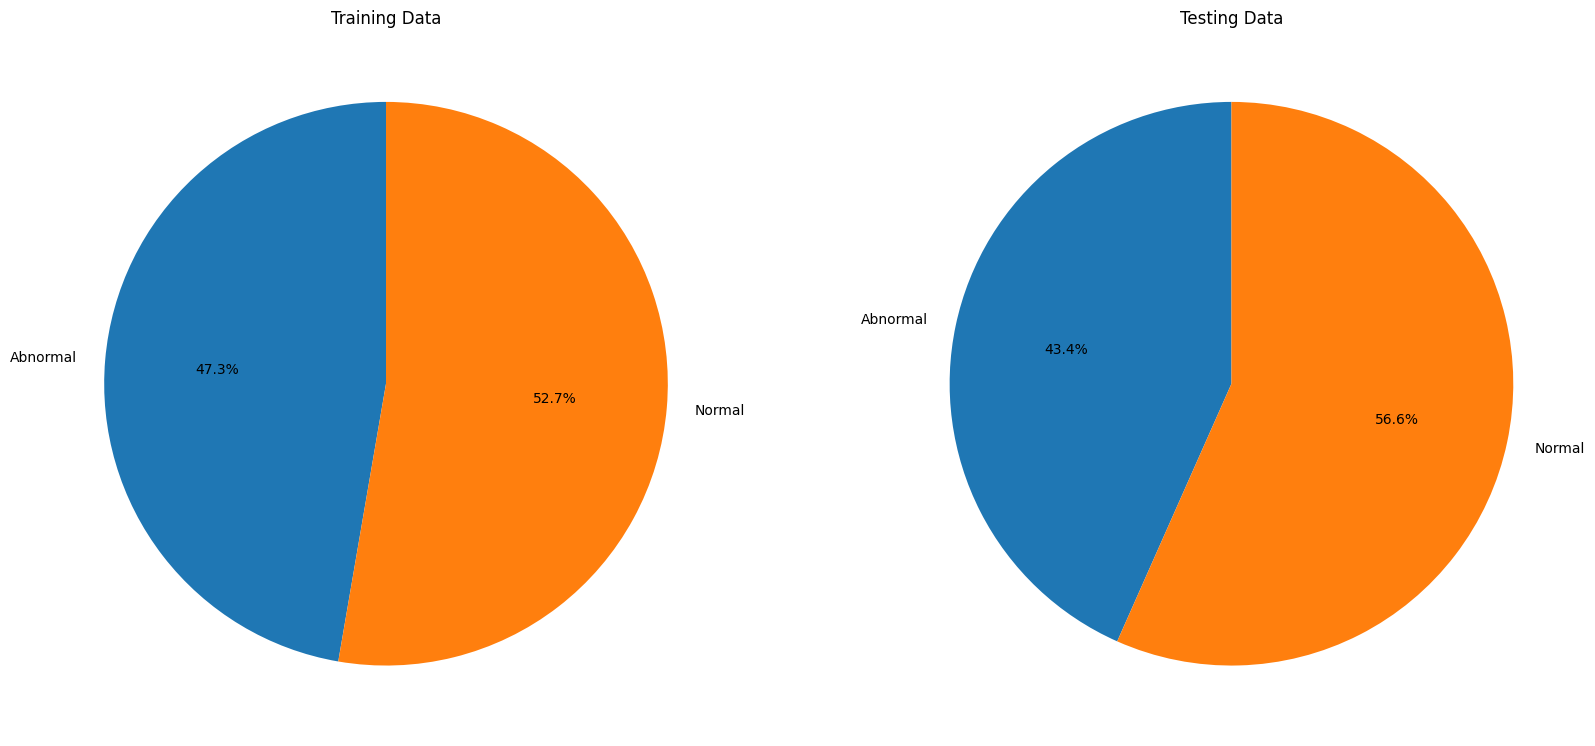

In [5]:

root_dir = os.getcwd() + '/data'

# Lists to store audio files and their corresponding labels
AudioFiles = []
AudioLabels = []

# Iterate through directories and files
for subdir, dirs, files in os.walk(root_dir, topdown=False):
    for file in files:
        # Check if file is a .wav file
        if file.endswith('.wav'):
            AudioFiles.append(os.path.join(subdir, file))
            if "Abnormal" in subdir:
                AudioLabels.append(0)  # Abnormal label
            elif "Normal" in subdir:
                AudioLabels.append(1)  # Normal label
        else:
            # Skip non-.wav files
            print(f"Skipping fi 2016le: {file}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(AudioFiles, AudioLabels, test_size=0.2)

# Pie chart to visualize the distribution of labels
labels = 'Abnormal', 'Normal'
sizes_train = [y_train.count(0), y_train.count(1)]
sizes_test = [y_test.count(0), y_test.count(1)]

fig, axes = plt.subplots(1, 2, figsize=(20, 15))
axes[0].pie(sizes_train, labels=labels, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Training Data')
axes[1].pie(sizes_test, labels=labels, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Testing Data')
plt.show()




### Function to resample the audio files and calculate the discrete wavelet tranform for these files

In [6]:
#write a function to calculate the discrete wavelet transform of the audio files
def wavelet_transform(data):
    wavelet = 'haar'
    level = 5
    d, sr = librosa.load(data)
    new_sample_rate = 1000
    resampled_data = librosa.resample(y=d,orig_sr=sr,target_sr=new_sample_rate)
    wavelet_coeffs = pywt.wavedec(resampled_data, wavelet, level=level)
    wavelet_coeffs = np.concatenate(wavelet_coeffs)

    #returning the first 1000 coefficients
    return wavelet_coeffs[:10000]
    

### Feature Extraction process

In [7]:
train_features = []
test_features = []

for file in X_train:
    #data, sr = librosa.load(file)
    wavelet_coeffs = wavelet_transform(file)
    train_features.append(wavelet_coeffs)

for file in X_test:
    #data, sr = librosa.load(file)
    wavelet_coeffs = wavelet_transform(file)
    test_features.append(wavelet_coeffs)

# Convert the lists of padded wavelet coefficients into NumPy arrays


# # Find the maximum length of the wavelet coefficients
max_length = max([len(feature) for feature in train_features + test_features])

train_features = [np.pad(feature, (0, max_length - len(feature))) for feature in train_features]
test_features = [np.pad(feature, (0, max_length - len(feature))) for feature in test_features]

train_features = np.array(train_features)
test_features = np.array(test_features)

print(train_features.shape)
print(test_features.shape)


# Convert the lists of labels into NumPy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)





(1144, 10000)
(286, 10000)


#### accuracies of all the models are saved for further comparison

In [8]:
all_model_accuracy = []

### CNN model

In [9]:
def create_model(row,col):

        model = Sequential()

        model.add(Conv1D(256, 3, activation='relu', input_shape=(row,col)))
        model.add(MaxPool1D(2))
        # model.add(BatchNormalization())
        model.add(Dropout(0.4))

        model.add(Conv1D(128, 3, activation='relu'))
        model.add(MaxPool1D(2))
        # model.add(BatchNormalization())
        model.add(Dropout(0.4))

        model.add(Conv1D(64, 3, activation='relu'))
        model.add(MaxPool1D(2))
        # model.add(BatchNormalization())
        model.add(Dropout(0.4))

        model.add(Flatten())

        model.add(Dense(128, activation='relu'))
        model.add(Dense(64, activation='relu'))


        return model

### Model creation for further evalutation

In [10]:
# Base model creation and summary
model = create_model(train_features.shape[1], 1)

2024-04-11 12:20:43.729936: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-11 12:20:43.730528: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [11]:
extracted_features = keras.Model(inputs=model.inputs, outputs=model.layers[0].output)


# Extract features from training data
train_features = extracted_features.predict(train_features)
train_features = train_features[:, :10000]


# Extract features from testing data
test_features = extracted_features.predict(test_features)
test_features = test_features[:, :10000]
# test_features = test_features.reshape(test_features.shape[0], -1)


print(train_features.shape)
print(test_features.shape)


36/36 [==============================] - 6s 154ms/step


2024-04-11 12:20:49.607677: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 11712217088 exceeds 10% of free system memory.


In [ ]:
# Train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=10)
rf.fit(train_features, y_train)
y_pred = rf.predict(test_features)
accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Accuracy: {accuracy}')
all_model_accuracy.append(accuracy)


Random Forest Accuracy: 0.6573426573426573


In [ ]:
# Train an AdaBoost classifier
abc = AdaBoostClassifier(n_estimators=10)
abc.fit(train_features, y_train)
y_pred = abc.predict(test_features)
accuracy = accuracy_score(y_test, y_pred)
print(f'AdaBoost Accuracy: {accuracy}')
all_model_accuracy.append(accuracy)

/home/sourav/Documents/academics/6thsem/labs/CVLab/cdlabenv/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.6223776223776224


In [ ]:
model_accuracies = []

model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate= 0.01), loss='binary_crossentropy', metrics=['accuracy'])


for i in range(3):
    model.fit(train_features, y_train, epochs=5, batch_size=32, validation_data=(test_features, y_test), verbose=1)
    scores = model.evaluate(test_features, y_test, verbose=1)
    model_accuracies.append(np.mean(scores))

print(np.mean(model_accuracies))
all_model_accuracy.append(np.mean(model_accuracies))

Epoch 1/5
 2/36 [>.............................] - ETA: 47s - loss: 0.7961 - accuracy: 0.5156 

KeyboardInterrupt: 

In [ ]:
# Plot the accuracy of all models
plt.figure(figsize=(15, 10))  # Increase the plot window size
cases = ['Random Forest', 'AdaBoost' , 'CNN', ]
plt.bar(cases, all_model_accuracy)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.show()